# Week 2 Data Exploration
## Judy Saunders
The purpose of this assignment is to begin analyzing [Ellis Act Application Data](https://housing.lacity.gov/ellis).  Ellis Act Application data provides insight into when units under the rent stabilization ordinance go off the market, what year they went off the market, and what council district the units were in.

In [4]:
# import data library
import pandas as pd


In [6]:
# Load the Data into a DataFrame
data = pd.read_csv("Ellis CPRA Workbook.xlsx(2).csv")

In [8]:
# Review data
data.head()

,APN,Application Received,Application Year,Council District,Address,City,Zip,Units Withdrawn,Replacement Unit
0,2040031029,11/6/2019,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3.0,NaN
1,2040031030,12/4/2019,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3.0,NaN
2,2040031050,2/25/2016,2016,3,22769 W DEL VALLE ST,LOS ANGELES,91364.0,2.0,22.0
3,2040033033,2/10/2016,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3.0,NaN
4,2107011026,6/29/2023,2023,3,20137 W ARMINTA ST,LOS ANGELES,91306.0,2.0,NaN


In [9]:
# Get the shape of the dataset
data.shape

(3359, 9)

In [10]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   APN                   3359 non-null   int64  
 1   Application Received  3359 non-null   object 
 2   Application Year      3359 non-null   int64  
 3   Council District      3359 non-null   int64  
 4   Address               3357 non-null   object 
 5   City                  3357 non-null   object 
 6   Zip                   3357 non-null   float64
 7   Units Withdrawn       3358 non-null   float64
 8   Replacement Unit      781 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 236.3+ KB


In [11]:
# Display the first few rows
data.head()

,APN,Application Received,Application Year,Council District,Address,City,Zip,Units Withdrawn,Replacement Unit
0,2040031029,11/6/2019,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3.0,NaN
1,2040031030,12/4/2019,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3.0,NaN
2,2040031050,2/25/2016,2016,3,22769 W DEL VALLE ST,LOS ANGELES,91364.0,2.0,22.0
3,2040033033,2/10/2016,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3.0,NaN
4,2107011026,6/29/2023,2023,3,20137 W ARMINTA ST,LOS ANGELES,91306.0,2.0,NaN


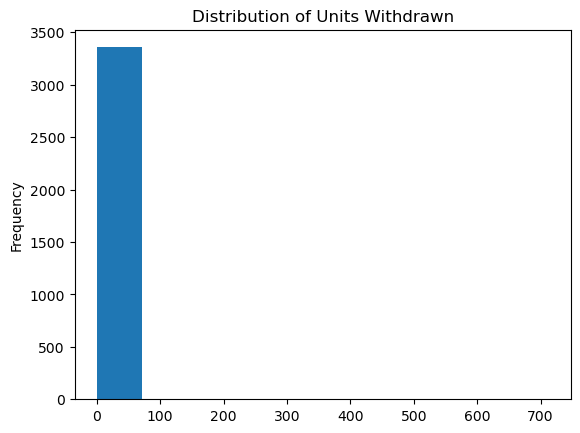

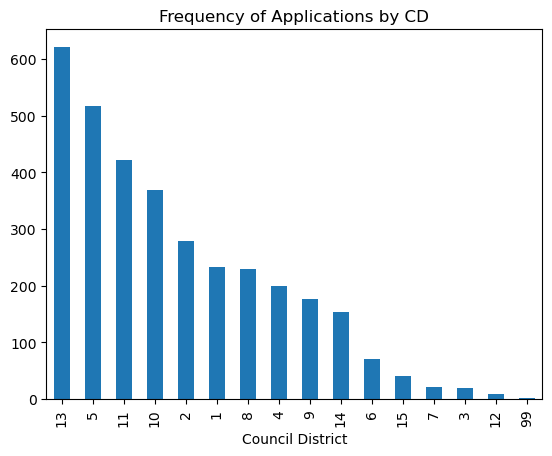

In [14]:
import matplotlib.pyplot as plt

# Plot a histogram for a numeric column (e.g., Units Withdrawn)
data['Units Withdrawn'].plot(kind='hist', title='Distribution of Units Withdrawn')
plt.show()

# Count and plot a categorical column (e.g., City)
data['Council District'].value_counts().plot(kind='bar', title='Frequency of Applications by CD')
plt.show()

In [15]:
# Examine the frequency of unique values in the columns
data['Council District'].value_counts()

Council District
13    621
5     517
11    422
10    369
2     278
1     233
8     229
4     200
9     177
14    153
6      71
15     40
7      21
3      19
12      8
99      1
Name: count, dtype: int64

In [18]:
# Filter applications for the year 2020 to see how many RSOs went off the market during the first year of the pandemic
filtered_data_2020 = data[data['Application Year'] == 2020]

filtered_data_2020.head()

,APN,Application Received,Application Year,Council District,Address,City,Zip,Units Withdrawn,Replacement Unit
5,2107014004,4/21/2020,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3.0,NaN
16,2153025014,9/1/2020,2020,3,5649 N MELVIN AVE,LOS ANGELES,91356.0,2.0,NaN
40,2224025013,6/25/2020,2020,6,6855 N WOODLEY AVE,VAN NUYS,91406.0,2.0,NaN
41,2224028045,5/28/2020,2020,6,15901 W VANOWEN ST,VAN NUYS,91406.0,2.0,6.0
56,2238006022,2/19/2020,2020,2,13940 VANOWEN ST,VAN NUYS,91405.0,3.0,NaN


In [19]:
# Sum the total number of applications in 2020
total_applications_2020 = filtered_data_2020.shape[0]

print(f"Total number of applications in 2020: {total_applications_2020}")

Total number of applications in 2020: 182


In [20]:
# Sum the total number of units withdrawn in 2020
units_off_market_2020 = filtered_data_2020['Units Withdrawn'].sum()

print(f"Total number of units withdrawn in 2020: {units_off_market_2020}")

Total number of units withdrawn in 2020: 598.0


In [21]:
# Pivot the data to create a matrix-like structure for council districts and years
heatmap_data = ellis_applications.pivot(index='Council District', columns='Application Year', values='Application Count').fillna(0)

# Preview the pivoted data
print(heatmap_data)


Application Year  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
Council District                                                               
1                  1.0   7.0   0.0   1.0   2.0   4.0   4.0  18.0  21.0  20.0   
2                  4.0   4.0   2.0   4.0   5.0   4.0   6.0  16.0  27.0  31.0   
3                  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   5.0   
4                  4.0   4.0   0.0   1.0   9.0   5.0  12.0  15.0  16.0  29.0   
5                  7.0   5.0   3.0   1.0  10.0  15.0  18.0  49.0  64.0  57.0   
6                  1.0   2.0   0.0   1.0   0.0   0.0   3.0   5.0   8.0  10.0   
7                  0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   2.0   
8                  0.0   2.0   1.0   0.0   0.0   1.0   3.0  10.0   5.0  14.0   
9                  4.0   0.0   0.0   1.0   0.0   1.0   0.0   9.0   9.0   6.0   
10                 6.0   2.0   0.0   1.0   5.0   4.0  10.0  16.0  26.0  31.0   
11                 7.0   4.0   2.0  14.0

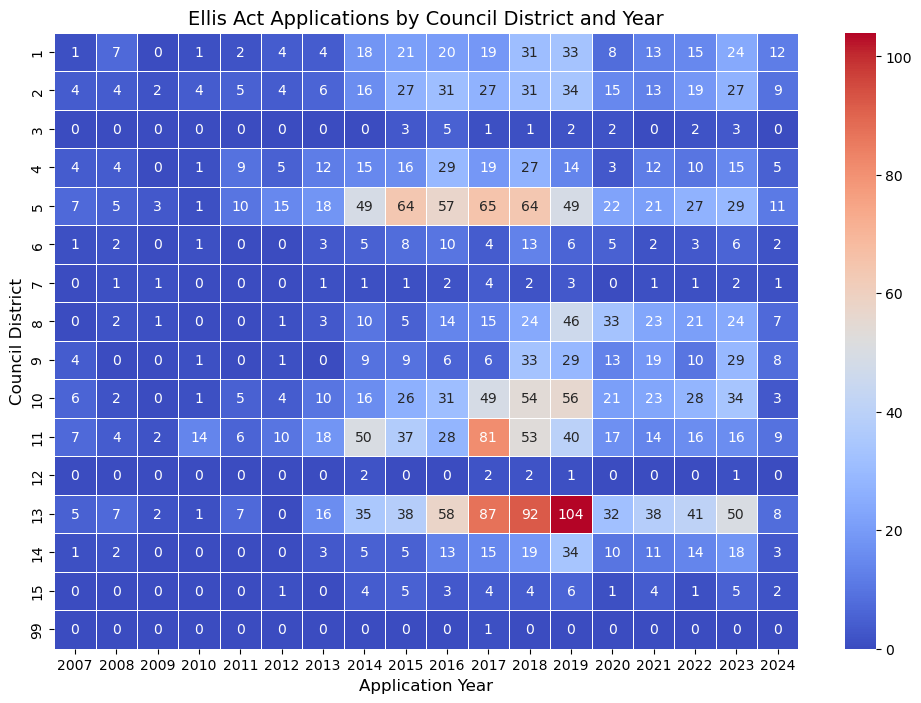

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)

# Add labels and title
plt.title('Ellis Act Applications by Council District and Year', fontsize=14)
plt.xlabel('Application Year', fontsize=12)
plt.ylabel('Council District', fontsize=12)

# Display the heatmap
plt.show()
